In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ankieta.csv')
df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: int(x) if pd.notnull(x) else x)

C:\Users\wikto\AppData\Local\Temp\ipykernel_150540\3837166424.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: int(x) if pd.notnull(x) else x)


In [3]:
df

,Sygnatura czasowa,Jakość p1-1 (0-100),Jakość p1-2 (0-100),Jakość p1-3 (0-100),Jakość p1-4 (0-100),Jakość p1-5 (0-100),Jakość p1-6 (0-100),Jakość p1-7 (0-100),Jakość p1-8 (0-100),Jakość p2-1 (0-100),...,Jakość p7-7 (0-100),Jakość p7-8 (0-100),Jakość p8-1 (0-100),Jakość p8-2 (0-100),Jakość p8-3 (0-100),Jakość p8-4 (0-100),Jakość p8-5 (0-100),Jakość p8-6 (0-100),Jakość p8-7 (0-100),Jakość p8-8 (0-100)
0,2025/01/19 12:32:27 AM CET,20.0,95.0,0.0,96.0,95.0,98.0,80.0,98.0,30.0,...,87.0,20.0,100.0,100.0,100.0,50.0,45.0,70.0,98.0,85.0
1,2025/01/19 12:06:42 PM CET,25.0,95.0,20.0,100.0,90.0,100.0,70.0,85.0,78.0,...,90.0,34.0,90.0,95.0,100.0,64.0,70.0,72.0,98.0,100.0
2,2025/01/19 1:25:49 PM CET,65.0,100.0,20.0,91.0,100.0,95.0,78.0,88.0,87.0,...,81.0,52.0,73.0,95.0,95.0,54.0,93.0,78.0,92.0,95.0
3,2025/01/19 1:33:42 PM CET,5.0,95.0,30.0,95.0,80.0,95.0,75.0,98.0,50.0,...,95.0,10.0,90.0,95.0,100.0,20.0,60.0,80.0,95.0,90.0
4,2025/01/19 1:45:31 PM CET,50.0,95.0,25.0,95.0,80.0,95.0,70.0,90.0,70.0,...,87.0,50.0,85.0,99.0,99.0,65.0,80.0,80.0,99.0,99.0
5,2025/01/19 2:02:34 PM CET,50.0,85.0,20.0,70.0,90.0,95.0,60.0,90.0,50.0,...,80.0,60.0,80.0,80.0,100.0,70.0,60.0,70.0,95.0,100.0
6,2025/01/19 2:14:25 PM CET,30.0,100.0,0.0,100.0,80.0,100.0,70.0,100.0,30.0,...,100.0,30.0,100.0,100.0,100.0,50.0,100.0,80.0,100.0,100.0
7,2025/01/19 2:32:30 PM CET,50.0,100.0,20.0,100.0,90.0,95.0,75.0,90.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2025/01/19 2:37:25 PM CET,50.0,90.0,20.0,99.0,90.0,99.0,50.0,95.0,60.0,...,80.0,30.0,80.0,90.0,90.0,40.0,70.0,50.0,90.0,90.0
9,2025/01/19 2:42:32 PM CET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,50.0,85.0,100.0,100.0,75.0,90.0,80.0,100.0,100.0


In [4]:
order = pd.read_excel('ankieta_mapowanie.xlsx')

In [5]:
order

,Unnamed: 0,pytanie1,pytanie2,pytanie3,pytanie4,pytanie5,pytanie6,pytanie7,pytanie8
0,ref,6,6,8,1,7,1,4,3
1,bigvgan,1,2,1,2,2,6,8,4
2,diffwave,5,4,4,5,4,4,3,1
3,hifigan,8,5,7,3,5,8,7,2
4,waveglow,7,8,2,4,1,5,5,6
5,univnet,2,3,3,8,3,7,6,7
6,vocos,4,7,5,6,6,2,1,8
7,griffinlimm,3,1,6,7,8,3,2,5


In [6]:
results = []
standard_error = []
for i, row in order.iterrows():
    model = row['Unnamed: 0']
    model_results = []
    model_standard_error = []
    for j in range(1, 9):
        index = row[f'pytanie{j}']
        answers = df[f'Jakość p{j}-{index} (0-100)']
        answers = np.array([v if v is not None else np.nan for v in answers])
        score = np.nanmean(answers)
        std_dev = np.nanstd(answers, ddof=1)
        n = np.count_nonzero(~np.isnan(answers))
        error = std_dev / np.sqrt(n)
        model_results.append(score)
        model_standard_error.append(error)
    results.append([model, *model_results])
    standard_error.append([model, *model_standard_error])

results = pd.DataFrame(results, columns=['model', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'])
standard_error = pd.DataFrame(standard_error, columns=['model', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'])

In [7]:
model_answers = {}
for i, row in order.iterrows():
    model = row['Unnamed: 0']
    model_answers[model] = []
    for j in range(1, 9):
        index = row[f'pytanie{j}']
        answers = df[f'Jakość p{j}-{index} (0-100)']
        model_answers[model].extend(list(answers))


In [8]:
best_model_title = {model: 0 for model in model_answers}
over90score = {model: 0 for model in model_answers}
for i in range(len(model_answers['ref'])):
    best_models = []
    over90 = []
    best_score = -1
    for model in model_answers:
        score = model_answers[model][i]
        if score is not None:
            if score >= 90:
                over90.append(model)
            if best_score < score:
                best_models = [model]
                best_score = score
            elif best_score == score:
                best_models.append(model)
    for model in best_models:
        best_model_title[model] += 1
    for model in over90:
        over90score[model] += 1

In [9]:
{model: val / len(model_answers['ref']) for model, val in best_model_title.items()}

{'ref': 0.7067307692307693,
 'bigvgan': 0.004807692307692308,
 'diffwave': 0.04326923076923077,
 'hifigan': 0.2403846153846154,
 'waveglow': 0.004807692307692308,
 'univnet': 0.39903846153846156,
 'vocos': 0.4951923076923077,
 'griffinlimm': 0.057692307692307696}

In [10]:
{model: val / len(model_answers['ref']) for model, val in over90score.items()}

{'ref': 0.8317307692307693,
 'bigvgan': 0.009615384615384616,
 'diffwave': 0.10096153846153846,
 'hifigan': 0.4951923076923077,
 'waveglow': 0.009615384615384616,
 'univnet': 0.6586538461538461,
 'vocos': 0.7211538461538461,
 'griffinlimm': 0.09134615384615384}

procent odpowiedzi na pytania osób, gdzie dany model jest uznany za najlepszy

Jak jest remis to idzie na wszystkie remisujące

In [11]:
results

,model,p1,p2,p3,p4,p5,p6,p7,p8
0,ref,92.40,92.88,87.75,97.32,94.00,98.040000,90.28,97.16
1,bigvgan,33.64,30.92,41.48,33.72,28.36,36.920000,33.12,42.56
2,diffwave,78.96,55.16,64.36,46.36,64.12,53.166667,61.44,78.08
3,hifigan,83.08,84.88,74.24,83.20,80.76,86.960000,84.44,89.68
4,waveglow,52.52,49.16,33.52,47.20,31.68,42.200000,37.80,65.60
5,univnet,90.36,91.92,79.52,86.84,80.32,96.160000,88.32,94.76
6,vocos,90.64,91.48,92.20,90.76,88.36,96.750000,86.92,95.84
7,griffinlimm,13.12,54.68,15.32,75.36,11.24,44.375000,10.92,68.08


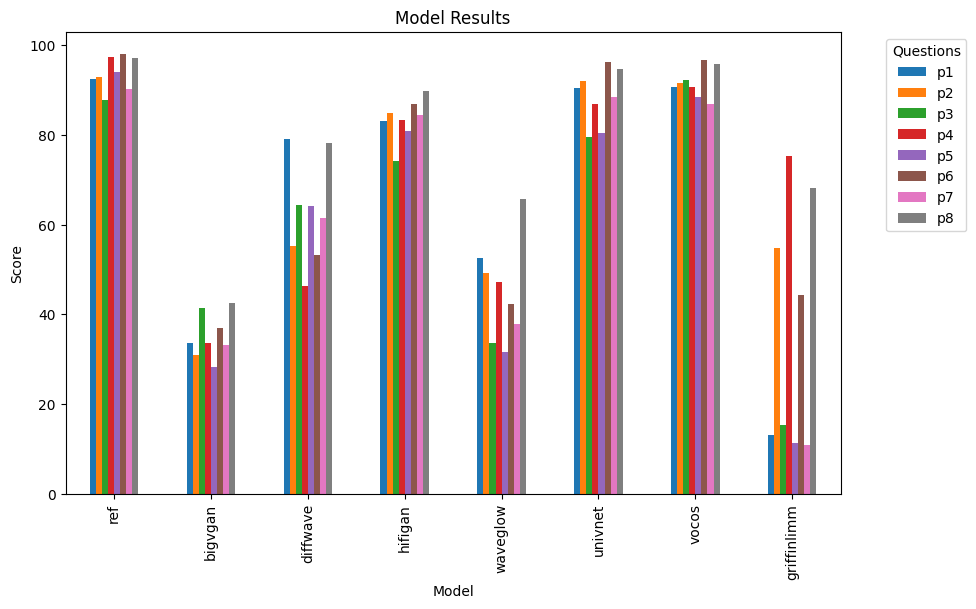

In [12]:
import matplotlib.pyplot as plt

results.set_index('model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Results')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Questions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

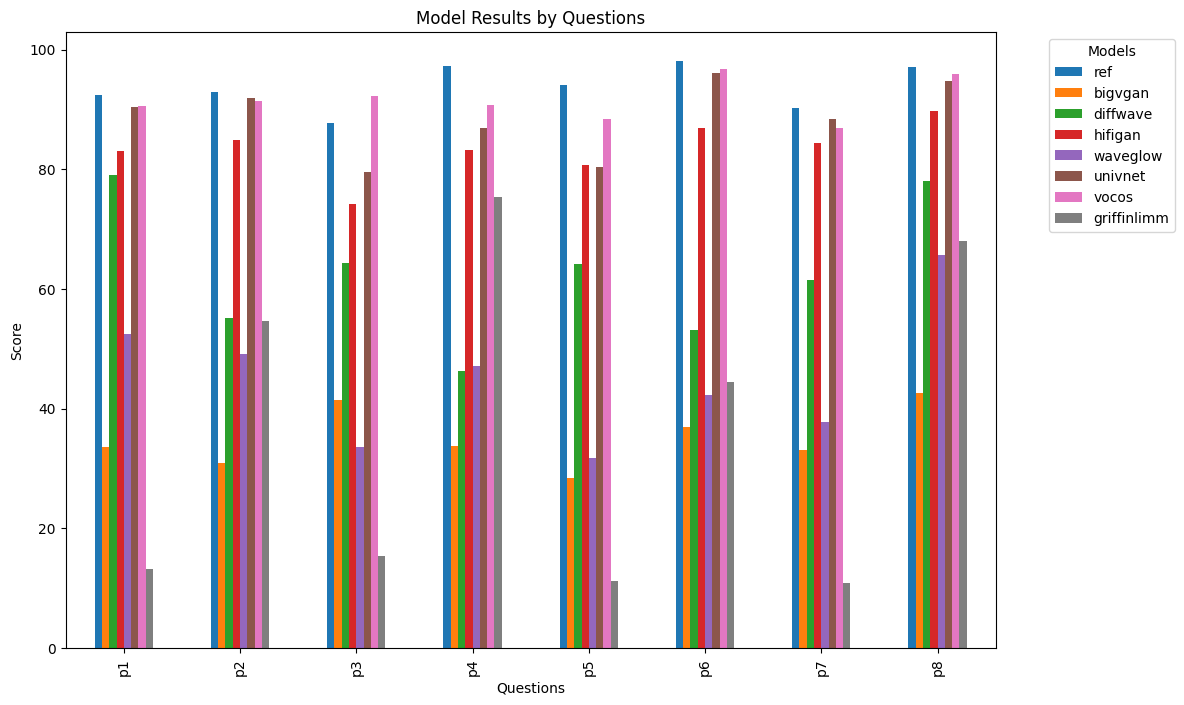

In [13]:
results_transposed = results.set_index('model').transpose()

ax = results_transposed.plot(kind='bar', figsize=(12, 8))
plt.title('Model Results by Questions')
plt.xlabel('Questions')
plt.ylabel('Score')
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

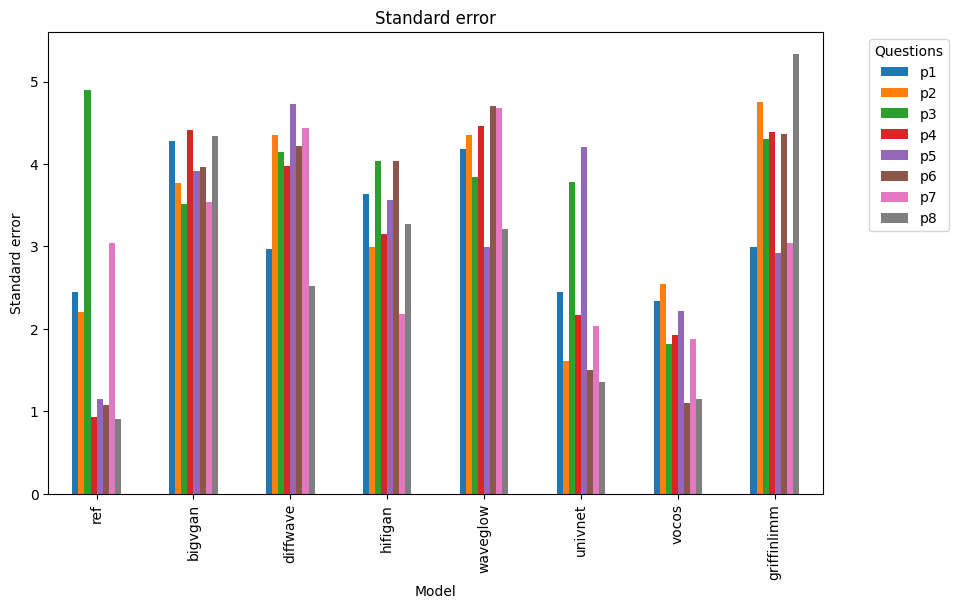

In [14]:
standard_error.set_index('model').plot(kind='bar', figsize=(10, 6))
plt.title('Standard error')
plt.xlabel('Model')
plt.ylabel('Standard error')
plt.legend(title='Questions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
average_scores = results.drop(columns=['model']).mean(axis=1)
average_scores = pd.DataFrame({'model': results['model'], 'average_score': average_scores})
average_scores

,model,average_score
0,ref,93.728750
1,bigvgan,35.090000
2,diffwave,62.705833
3,hifigan,83.405000
4,waveglow,44.960000
5,univnet,88.525000
6,vocos,91.618750
7,griffinlimm,36.636875


In [16]:
average_standard_error = standard_error.drop(columns=['model']).mean(axis=1)
average_standard_error = pd.DataFrame({'model': standard_error['model'], 'average_standard_error': average_standard_error})
average_standard_error

,model,average_standard_error
0,ref,2.083147
1,bigvgan,3.966166
2,diffwave,3.917035
3,hifigan,3.357872
4,waveglow,4.053443
5,univnet,2.389322
6,vocos,1.870638
7,griffinlimm,4.013568
